# Data leak analysis

Data leaks are the flow of such information to the data science contest participants that would not be available
if the data science task would be performed in a real life setting, not as a task in a contest. 

Examples of possible mechanisms for data leaks:
* leaks through the contest leaderboard
* temporal overlapping or interleaving of training and testing periods, if the task involves a temporal element
* naming of variables in a prediction task so that the names reveal something about the true values of the target variable in the test set
* numerical encoding categorical variable values so that the ordering reveal something about the true values of the target variable in the test set
* ordering the test cases so that the ordering reveal something about the true values of the target variable in the test set

In a general case, analysis can not rule out the possibility of data leaks to exist. It is only possible to positively identify 
data leaks. One can also hypothesise mechanisms for data leaks and check whether they really exist in the particular contest at hand.



## Leaderboard

Every time a contestant receives a score on the leaderboard for his submission, some leakage of information happens: how close 
the submission was to the prediction target. The leaderboard can be systematically probed to bring the submissions closer to the target.

Any validation of submissions on the leaderboard causes some data to leak through the leaderboard. However, in the case of the current C1 contest 
the submissions have so many independent entries, i.e. large information content, that the amount of information leaking through the leaderboard
is minor in comparison. On the other hand, the importance of the data leak by LB validation increases in the case of this contest, as it is difficult to construct other alternative validation mechanisms that would accurately reflect the characteristics of the evaluation data. 

Our solution to the predistion task employs some leaderboard probing to determine the optimal scaling of the predictions as a post-processing step. More aggressive validation on the leaderboard would have probably resulted in better accuracy of predictions.

Contests often have separate public and private leaderboards. Maximising the private leaderboard score can uaually be regarded as the real task 
of the contest. One type of data leak is the leakage between public and private leaderboards. Without such leakage, even exhaustive probing of the public leaderboard would only provide an additional training set for the private prediction task. However, in this contest the private and public leaderboards temporally share the same evaluation period, as shown by the analysis in the next notebook cells, and seemingly randomly split the evaluation cases between the two leaderboards. Consequently, the evaluation sets seem to share many statistics and at least the similar temporal trend in comparison with the training data. This means that in this contest, probing the public leaderboard almost directly reveals how to improve in the private prediction task. This is evidenced also by the following scatter plot that shows the correlation between public and private leaderboard scores of some of our recent submissions, evaluated by the Coursera grader.




<AxesSubplot:>

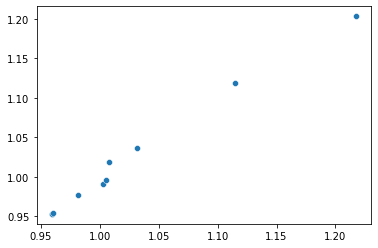

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

public_scores=[
    0.959457,
    0.959404,
    0.960635,
    1.003010,
    0.981348,
    1.005539,
    1.007823, 
    1.031497,
    1.114415,
    1.217538, 
]
private_scores=[
    0.953158,
    0.953130,
    0.954215,
    0.991288,
    0.977585,
    0.996209,
    1.019363,
    1.036105,
    1.119150,
    1.203256
]

sns.scatterplot(x=public_scores, y=private_scores)

We see there is rather direct leak between public and private leaderboards. In the context of the Coursera course
this bears no practical significance as the Coursera grader directly reports also the private leaderboard score. In this case, there is no need to use the public LB as a proxy for the private LB. In a standard Kaggle competition setting where only the public LB can be probed, the situation would be different, and the private LB score could be improved by probing the public leaderboard.   

## Temporal arrangement of data

If the prediction task involves a temporal element, data leaks are practically unavoidable unless training and test data originate from distinct time intervals. In the present competition, the training and test data time periods indeed are temporally distinct and not interleaved. Time interval overlap does not cause data leaks here.

The public and private leaderboards, however, share the same time period and there is rather direct data leak between them. As mentioned already before, this does not have any pratical consequences in the Coursera project setting, however. 

## Naming of variables

It does not seem plausible that the provided variable names

could have been determined on the basis of the target variable values in the test set.